# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Import file, dropping non-ordinal colums

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')

Diamonds = \
    diamonds.loc[
        :,
        (diamonds.dtypes == 'float64') &
        (diamonds.columns != 'price')
    ]

diamonds_price = diamonds['price']

# Do the regression

## Train test splitting

In [3]:
Diamonds_train, Diamonds_test, diamonds_price_train, diamonds_price_test = \
    train_test_split(
        Diamonds, diamonds_price
    )

## Model

In [4]:
model = LinearRegression()
model.fit(Diamonds_train, diamonds_price_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
price_predicted = model.predict(Diamonds_test)

In [6]:
np.sqrt(mean_squared_error(diamonds_price_test, price_predicted))

1237.6407589845442

In [7]:
r2_score(diamonds_price_test, price_predicted)

0.9018143734814177

# Apply!

In [8]:
rick = pd.read_csv('rick_diamonds.csv')

## Qualify

In [9]:
clarities = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

rick['clarity_idx'] = [clarities.index(c) for c in rick.clarity]

In [10]:
colors = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

rick['color_idx'] = [colors.index(c) for c in rick.color]

In [11]:
cuts = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

rick['cut_idx'] = [cuts.index(c) for c in rick.cut]

## Select

In [12]:
rick_prediction = \
    model.predict( \
        rick[
            ['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_idx', 'color_idx', 'cut_idx']
        ]
    )

In [13]:
rick['price_predicted'] = rick_prediction

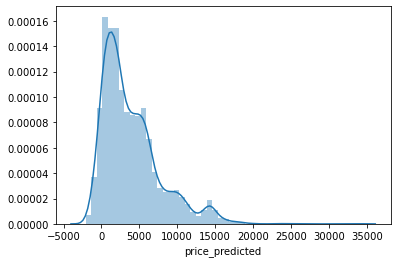

In [14]:
sns.distplot(rick['price_predicted'])

In [15]:
rick[
    ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price_predicted']
] \
    .to_csv('diamonds_rick.csv', index = False)